In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
df = pd.read_csv('data/kc_house_data.csv')

df.drop_duplicates(inplace=True)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21597, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
# sqft_basement => continuous 

#df['sqft_basement'].unique()
# '?' => drop 
#df.loc[df['sqft_basement']=='?'] = 'NaN'

#df.sqft_basement = df.astype({"sqft_basement":'float64'})


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
sqft_above,21597.0,1.788597e+03,8.277598e+02,3.700000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
yr_built,21597.0,1.971000e+03,2.937523e+01,1.900000e+03,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
yr_renovated,17755.0,8.363678e+01,3.999464e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03


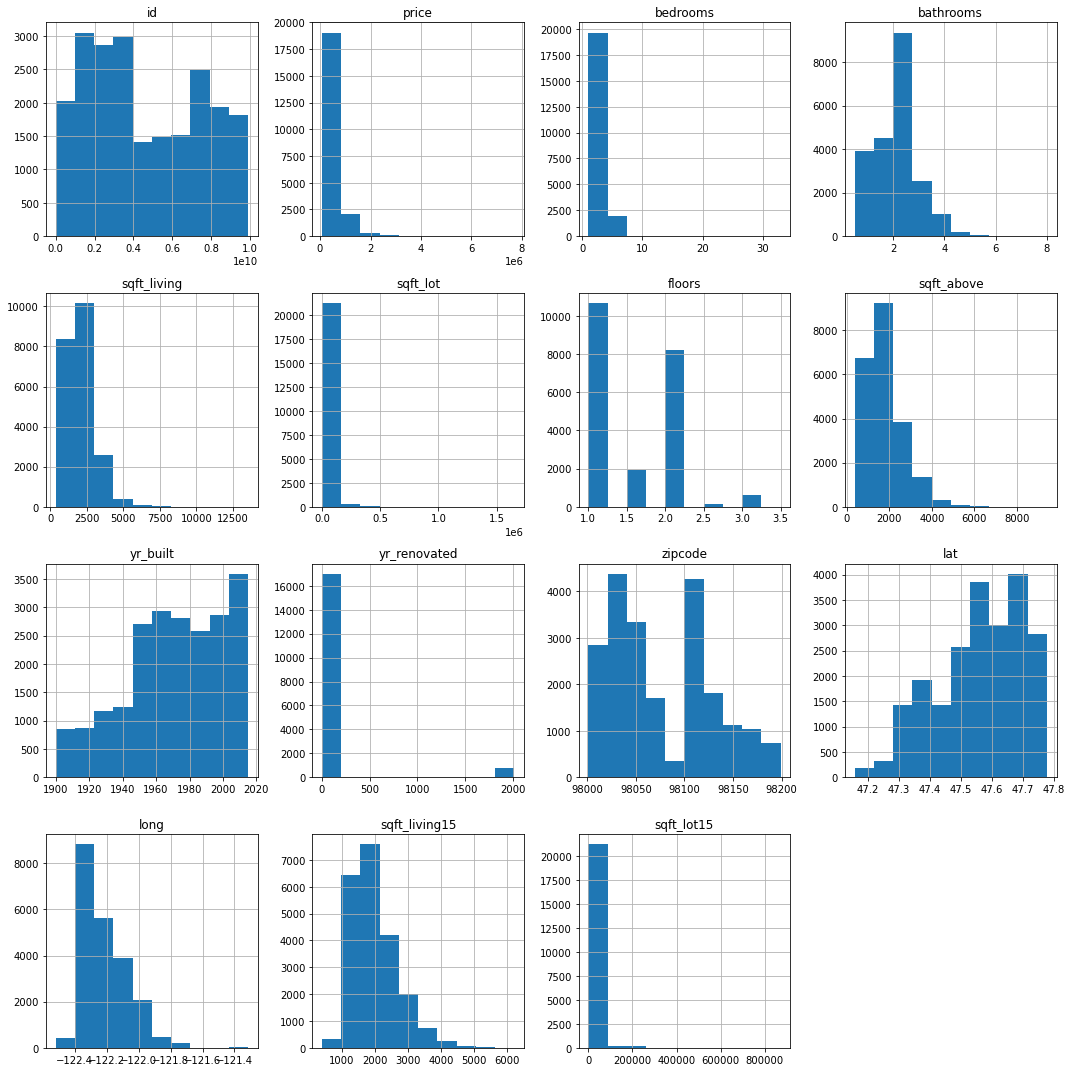

In [8]:
# Histogram for continuous variables 
cols = []
for x in df.columns: 
    if df[x].dtype != 'object': 
        cols.append(x)

df[cols].hist(figsize=(15,15))
plt.tight_layout()

In [9]:
df.select_dtypes('object').describe()

# sqft_basement => continuous 

,date,waterfront,view,condition,grade,sqft_basement
count,21597,19221,21534,21597,21597,21597
unique,372,2,5,5,11,304
top,6/23/2014,NO,NONE,Average,7 Average,0.0
freq,142,19075,19422,14020,8974,12826


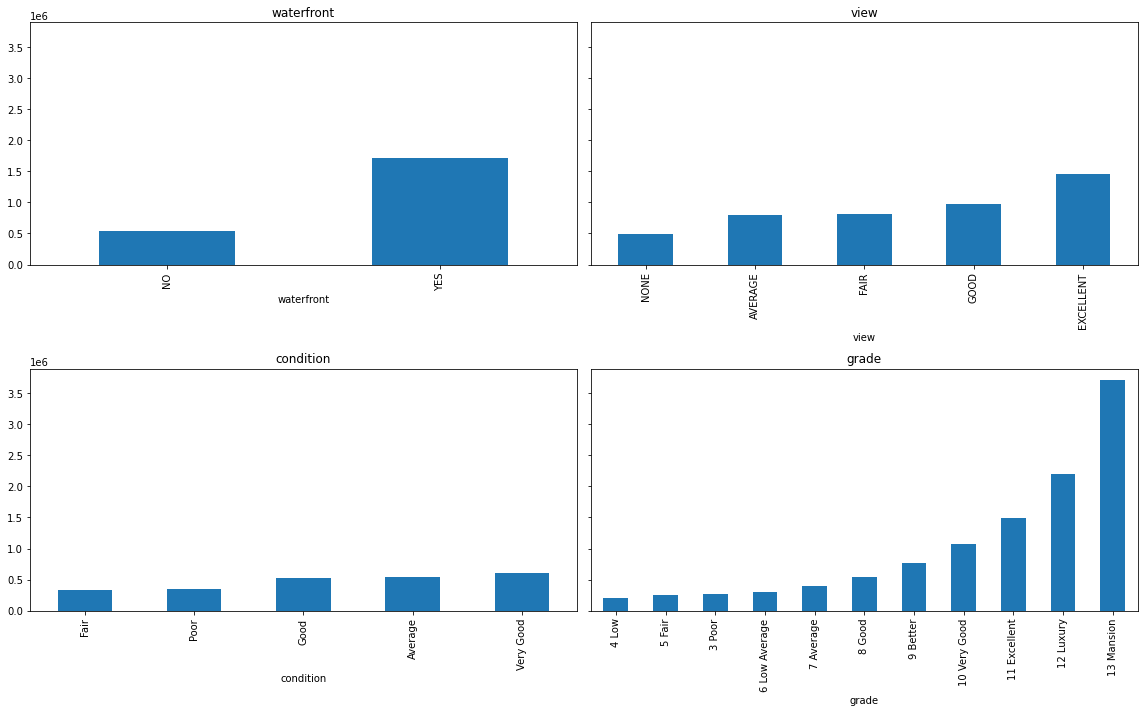

In [10]:
# Bar plots of average housing price by categories. 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16 , 10), sharey=True)

#select datatype=object
cate = df.select_dtypes('object').columns.drop(['date','sqft_basement'])

for xcol, ax in zip(cate, axes.flatten()):
    df.groupby(xcol).mean()['price'].sort_values().plot.bar(ax=ax)
    
    ax.set_title(xcol)  
    
    
fig.tight_layout()

In [11]:
# The data covers 2014 & 2015. 
pd.DatetimeIndex(df['date']).year.unique()

Int64Index([2014, 2015], dtype='int64', name='date')

In [12]:
# Number of houses sold by month 
pd.DatetimeIndex(df['date']).month.value_counts()

# May, April, July, June, Aug are busy months. Jan, Feb, Nov, Dec are low season. 


5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: date, dtype: int64

In [13]:
# Drop the following variables (according to the project description). 

drop=['view', 'sqft_above', 'sqft_basement', 'yr_renovated',
      'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [14]:
# reassigne dataframe

df.drop(labels=drop, axis=1, inplace=True)

In [15]:
df.info()
# 12 variables, n=21597 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   date         21597 non-null  object 
 2   price        21597 non-null  float64
 3   bedrooms     21597 non-null  int64  
 4   bathrooms    21597 non-null  float64
 5   sqft_living  21597 non-null  int64  
 6   sqft_lot     21597 non-null  int64  
 7   floors       21597 non-null  float64
 8   waterfront   19221 non-null  object 
 9   condition    21597 non-null  object 
 10  grade        21597 non-null  object 
 11  yr_built     21597 non-null  int64  
 12  zipcode      21597 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 2.3+ MB


In [16]:
# 5 points statistics 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1000102.0,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,78000.0,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.0,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,0.5,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,370.0,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,520.0,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.0,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
yr_built,21597.0,1.971000e+03,2.937523e+01,1900.0,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
zipcode,21597.0,9.807795e+04,5.351307e+01,98001.0,9.803300e+04,9.806500e+04,9.811800e+04,9.819900e+04


### 1. Data manipulation

#### 1.1 Missing variables (waterfront)

In [17]:
# waterfront has 2376 missing variables 
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
zipcode           0
dtype: int64

In [18]:
df.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [19]:
# convert nan => 'N/A'
df.waterfront = df.waterfront.fillna('N/A')

In [20]:
df.waterfront.unique()

array(['N/A', 'NO', 'YES'], dtype=object)

In [21]:
# zipcode of houses for missing waterfront variables  
waterfront_na = df.loc[df.waterfront=='N/A']
waterfront_na.zipcode.unique()

# from the zipcode, can not tell if 'N/A' = 'NO'

array([98178, 98007, 98030, 98074, 98105, 98166, 98004, 98056, 98058,
       98168, 98118, 98003, 98133, 98177, 98034, 98103, 98126, 98038,
       98040, 98053, 98023, 98052, 98042, 98059, 98117, 98146, 98014,
       98006, 98116, 98033, 98115, 98045, 98019, 98055, 98188, 98024,
       98125, 98198, 98031, 98109, 98002, 98065, 98144, 98199, 98092,
       98102, 98155, 98075, 98011, 98136, 98072, 98008, 98106, 98027,
       98029, 98005, 98070, 98028, 98022, 98108, 98010, 98001, 98112,
       98077, 98107, 98122, 98148, 98119, 98032, 98039])

In [22]:
#waterfront_na.view.value_counts()

#### 1.2 Housing price (y)

Text(0, 0.5, 'Density')

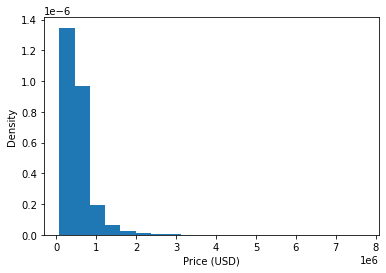

In [23]:
# Outliers skewe the distribution.  
plt.hist(x=df.price, bins=20, density=True)

plt.xlabel("Price (USD)")
plt.ylabel('Density')


In [24]:
print(f'Threshold price for top 1%: {df.price.quantile(0.99)}')
print(f'Threshold price for top 2.5%: {df.price.quantile(0.975)}')
print(f'Threshold price for top 5%: {df.price.quantile(0.95)}')

Threshold price for top 1%: 1970000.0
Threshold price for top 2.5%: 1490000.0
Threshold price for top 5%: 1160000.0


Text(0, 0.5, 'density')

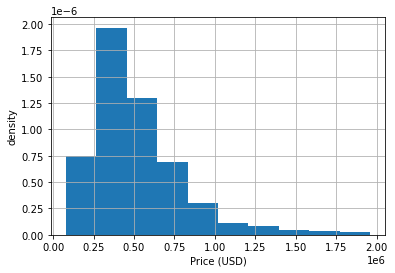

In [25]:
# If we drop top 1% (price >= 1970000), distribution looks less skewed 

df.loc[df.price < 1970000].price.hist(density=True)
plt.xlabel("Price (USD)")
plt.ylabel('density')

In [26]:
# Log transformation 
df['price_log']=np.log(df.price)

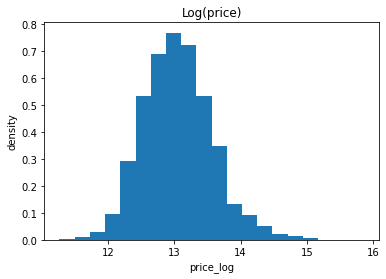

In [27]:
# Distribution of log(price) 

plt.hist(x=df.price_log, bins=20, density=True)
plt.title('Log(price)')
plt.xlabel('price_log')
plt.ylabel('density');

#### 1.3 Dependent Variables (X)

##### Number of bedrooms

In [28]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [29]:
# Drop outlier (the house with 33 bedrooms)
df = df.loc[df.bedrooms!=33]

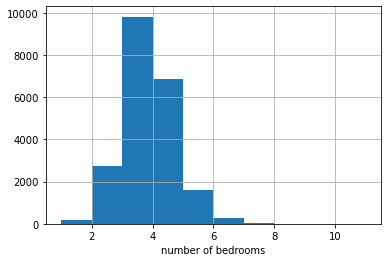

In [30]:
df.bedrooms.hist()
plt.xlabel('number of bedrooms');

# change to categorical values?? 

##### Number of Bathrooms

In [31]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [32]:
## what is .25, .75?? 
# convert to categorical values? 

##### Sqft_living

<AxesSubplot:>

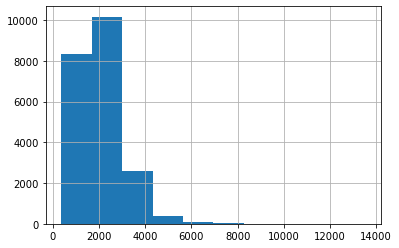

In [33]:
df.sqft_living.hist()

In [34]:
print(f'Threshold sqft_living for top 1%: {df.sqft_living.quantile(0.99)}')
print(f'Threshold sqft_living for top 2.5%: {df.sqft_living.quantile(0.975)}')
print(f'Threshold sqft_living for top 5%: {df.sqft_living.quantile(0.95)}')

Threshold sqft_living for top 1%: 4980.0
Threshold sqft_living for top 2.5%: 4270.0
Threshold sqft_living for top 5%: 3760.0


In [35]:
# number of houses which has sqft_living is above 99% threshold 
print(f'Number of houses which sqft_living > 99% threshold: {len(df.loc[df.sqft_living>df.sqft_living.quantile(0.99)])}')

# Average housing price for over 99% threshold sqft 
print (f'Average housing price for over 99% threshold sqft houses: {df.loc[df.sqft_living > df.sqft_living.quantile(0.99)].price.mean()}')
# Housing grade 
df.loc[df.sqft_living > df.sqft_living.quantile(0.99)].grade.value_counts()


Number of houses which sqft_living > 99% threshold: 215
Average housing price for over 99% threshold sqft houses: 2061799.534883721


11 Excellent    97
10 Very Good    48
12 Luxury       45
9 Better        13
13 Mansion      11
8 Good           1
Name: grade, dtype: int64

##### sqft_lot

<AxesSubplot:>

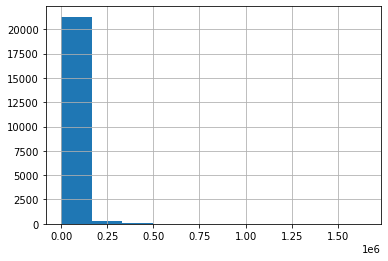

In [36]:
df.sqft_lot.hist()

In [37]:
print(f'Threshold sqft_lot for top 1%: {df.sqft_lot.quantile(0.99)}')
print(f'Threshold sqft_lot for top 2.5%: {df.sqft_lot.quantile(0.975)}')
print(f'Threshold sqft_lot for top 5%: {df.sqft_lot.quantile(0.95)}')

Threshold sqft_lot for top 1%: 213008.0
Threshold sqft_lot for top 2.5%: 85244.875
Threshold sqft_lot for top 5%: 43308.75


In [38]:
#df.sqft_lot.sort_values(ascending=False)[:20]

Number of houses which sqft_lot > 99% threshold: 217
Average housing price for over 99% threshold sqft houses: 695330.1843317972


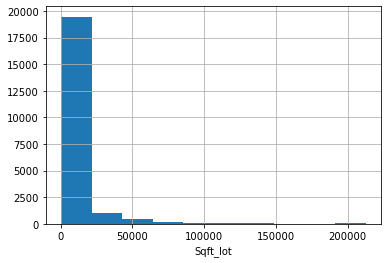

In [39]:
# number of houses which has sqft_lot is above 99% threshold 
print(f'Number of houses which sqft_lot > 99% threshold: {len(df.loc[df.sqft_lot>=df.sqft_lot.quantile(0.99)])}')

# Average housing price for over 99% threshold sqft 
print (f'Average housing price for over 99% threshold sqft houses: {df.loc[df.sqft_lot >= df.sqft_lot.quantile(0.99)].price.mean()}')
# Housing grade 
df.loc[df.sqft_lot > df.sqft_lot.quantile(0.99)].grade.value_counts()



# If we drop sqft_lot >= 99% threshold, distribution looks more normal. 
df.loc[df.sqft_lot < df.sqft_lot.quantile(0.99)].sqft_lot.hist()
plt.xlabel("Sqft_lot");

df.head()

## DROP THIS PART

In [40]:
# Drop this part 

# if sqft_lot is smaller than sqft_living => Drop 
#df['lot_living'] = df['sqft_lot'] - df['sqft_living']
#print(f'Number of houses which report sqft_lot < sqft_living: {len(df.loc[df.lot_living<0])}.')

In [41]:
# drop 788 observations which reported sqft_lot < sqft_living. 
#df = df.loc[df.lot_living >= 0]

##### floors

<AxesSubplot:>

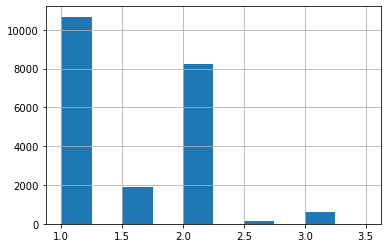

In [42]:
df.floors.hist()
# convert to categorial values? 

##### condition (categorical value)

In [43]:
df.condition.value_counts()

Average      14020
Good          5677
Very Good     1700
Fair           170
Poor            29
Name: condition, dtype: int64

##### grade (categorical value)

In [44]:
df.grade.value_counts()

7 Average        8973
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

##### yr_built

<AxesSubplot:>

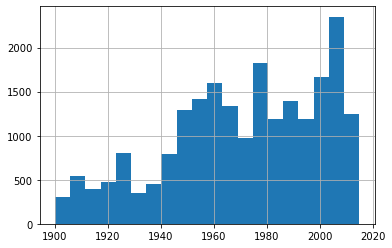

In [45]:
df.yr_built.hist(bins=20)

In [46]:
# vintage = year of house was sold - year of house was built  

# year of house was sold 
df['yr_sold']=pd.DatetimeIndex(df['date']).year

# year of house was sold - year of house was built
df['vintage'] = df['yr_sold'] - df['yr_built']


In [47]:
# some people purchase houses before it is built 
print (f'Number of houses sold before built: {len(df.loc[df.vintage<0])}')

Number of houses sold before built: 12


In [48]:
# For these houses, change vintage to 0
df.vintage.replace({-1:0}, inplace=True)


##### zipcode

In [49]:
# Create seattle dummy 
# In a city, sqft is smaller, price is higher. So, relationship between price and other house features will be different between houses in Seattle and houses outside of Seattle.

# 28 zipcodes for Seattle 
seattle_zipcode=[98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, 98134, 98136, 98144, 98146, 98154, 98164, 98174, 98177]

df['seattle'] = [1 if x in seattle_zipcode else 0 for x in df.zipcode]
df.seattle.sum()
# 6297 houses are in seattle 

6951

In [50]:
# number of observations = 2080
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21596 non-null  int64  
 1   date         21596 non-null  object 
 2   price        21596 non-null  float64
 3   bedrooms     21596 non-null  int64  
 4   bathrooms    21596 non-null  float64
 5   sqft_living  21596 non-null  int64  
 6   sqft_lot     21596 non-null  int64  
 7   floors       21596 non-null  float64
 8   waterfront   21596 non-null  object 
 9   condition    21596 non-null  object 
 10  grade        21596 non-null  object 
 11  yr_built     21596 non-null  int64  
 12  zipcode      21596 non-null  int64  
 13  price_log    21596 non-null  float64
 14  yr_sold      21596 non-null  int64  
 15  vintage      21596 non-null  int64  
 16  seattle      21596 non-null  int64  
dtypes: float64(4), int64(9), object(4)
memory usage: 3.0+ MB


### 2. Plotting price (y) and features (X) 

In [51]:
## scatter plot for continuous variables 

cont = df.select_dtypes(('int64', 'float64')).columns.drop(['id', 'yr_built', 'zipcode','seattle', 'yr_sold', 'price_log', 'bedrooms', 'floors'])
cont

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'vintage'], dtype='object')

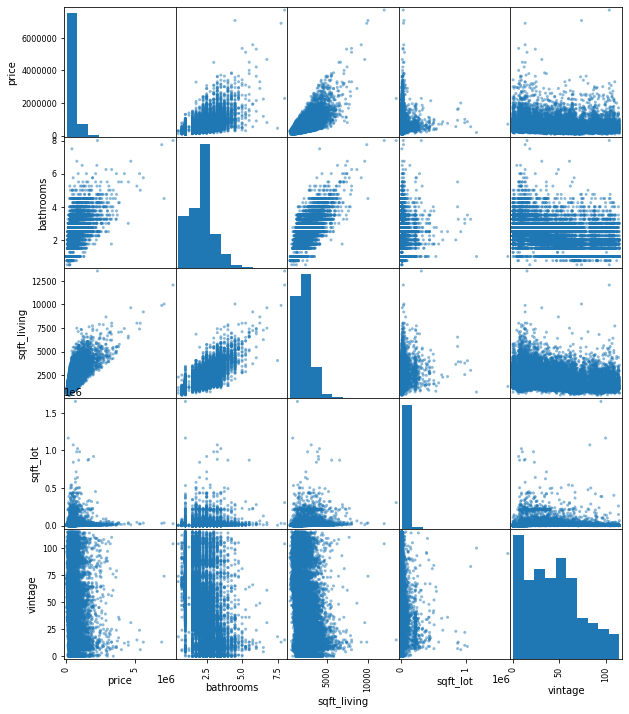

In [52]:
pd.plotting.scatter_matrix(df[cont], figsize=(10,12));

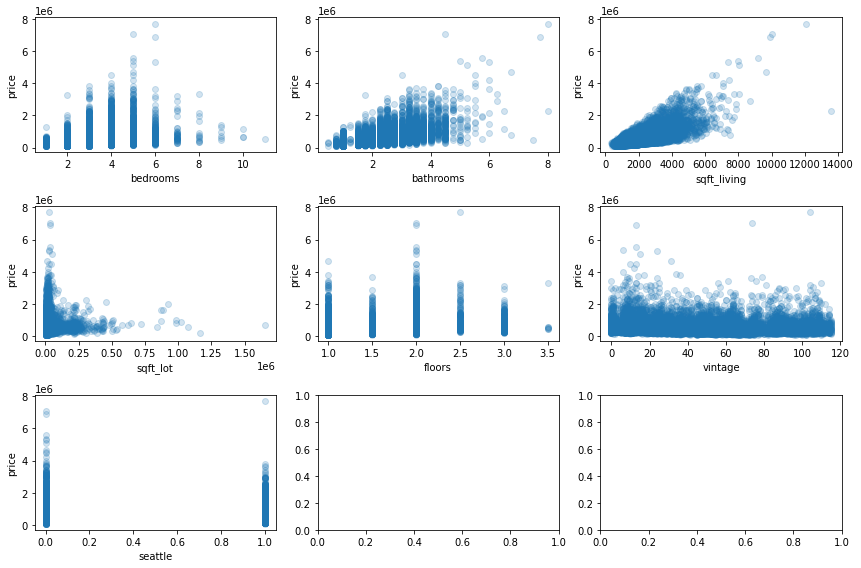

In [53]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 8))
fig.set_tight_layout(True)

xcont = df.select_dtypes(('int64', 'float64')).columns.drop(['id', 'yr_built', 'zipcode', 'yr_sold', 'price_log', 'price'])


for xcol, ax in zip(xcont, axes.flatten()):
    ax.scatter(df[xcol], df['price'], alpha=0.2)
    ax.set_xlabel(xcol)
    ax.set_ylabel("price")
    

In [54]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,price_log,yr_sold,vintage,seattle
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,N/A,Average,7 Average,1955,98178,12.309982,2014,59,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,98125,13.195614,2014,63,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,98028,12.100712,2015,82,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,98136,13.311329,2014,49,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,98074,13.142166,2015,28,0


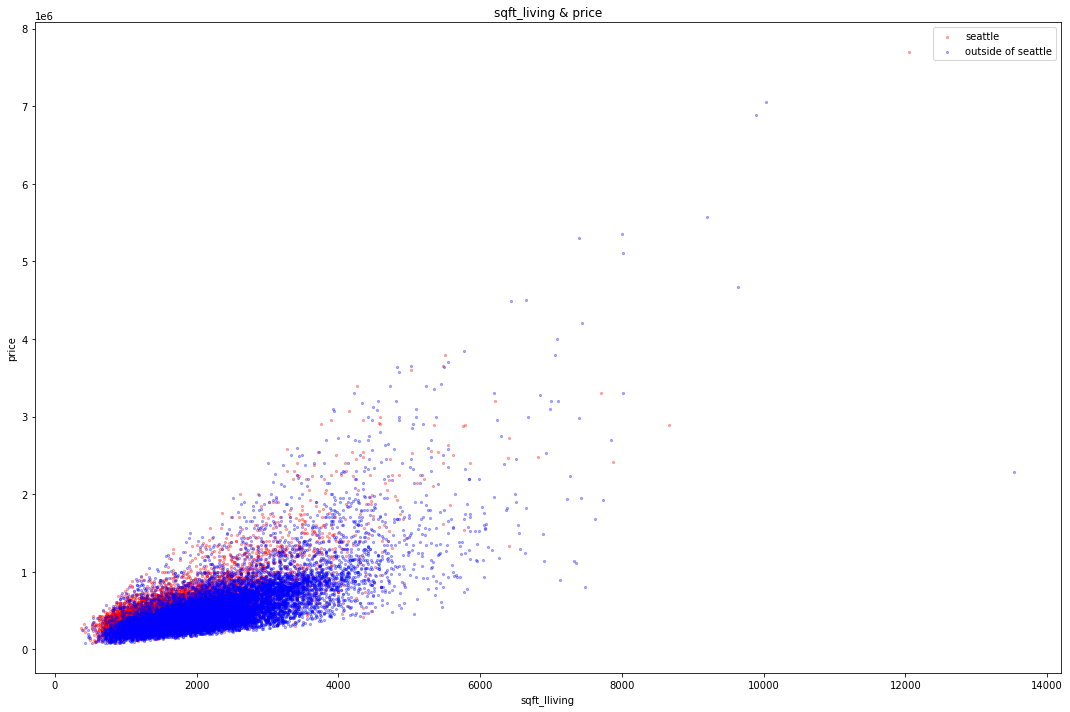

In [55]:
# Plot sqft_living and price 

plt.figure(figsize=(15, 10))
plt.scatter(x = df.loc[df.seattle==1].sqft_living , 
            y = df.loc[df.seattle==1].price , 
            c='r', s=5,
            alpha=0.3)
plt.scatter(x = df.loc[df.seattle==0].sqft_living , 
            y = df.loc[df.seattle==0].price , 
            c='b', s=5,
            alpha=0.3)


plt.xlabel("sqft_lliving")
plt.ylabel("price")
plt.title("sqft_living & price")
plt.legend(["seattle", "outside of seattle"])
plt.tight_layout()

In [56]:
sqrt99 = df.sqft_living.quantile(0.99)
sqrt99

4980.0

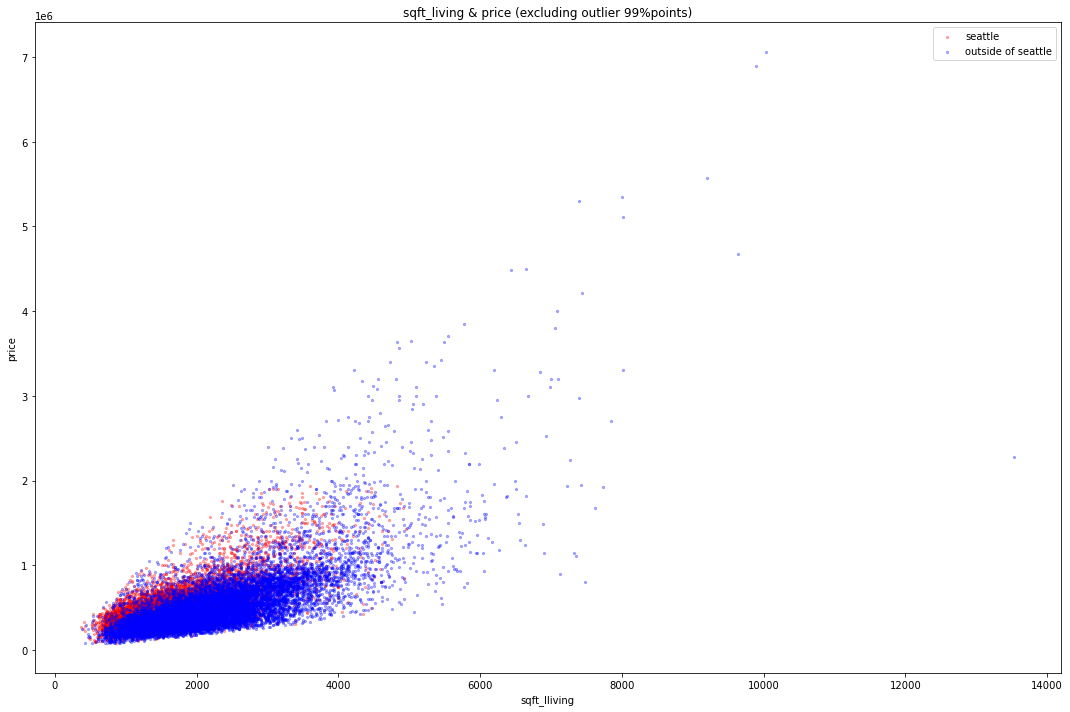

In [57]:
# Plot sqft_living and price, trimmed outlier (99%points)

sqrt99 = df.sqft_living.quantile(0.99)
price99 = df.price.quantile(0.99)

plt.figure(figsize=(15, 10))
plt.scatter(x = df.loc[(df.seattle==1) & (df.sqft_living < sqrt99)& (df.price < price99) ].sqft_living , 
            y = df.loc[(df.seattle==1) & (df.sqft_living < sqrt99)& (df.price < price99)].price , 
            c='r', s=5,
            alpha=0.3)
plt.scatter(x = df.loc[df.seattle==0 & (df.sqft_living < sqrt99) & (df.price < price99)].sqft_living , 
            y = df.loc[df.seattle==0 & ((df.sqft_living < sqrt99) & df.price < price99)].price , 
            c='b', s=5,
            alpha=0.3)


plt.xlabel("sqft_lliving")
plt.ylabel("price")
plt.title("sqft_living & price (excluding outlier 99%points)")
plt.legend(["seattle", "outside of seattle"])
plt.tight_layout()

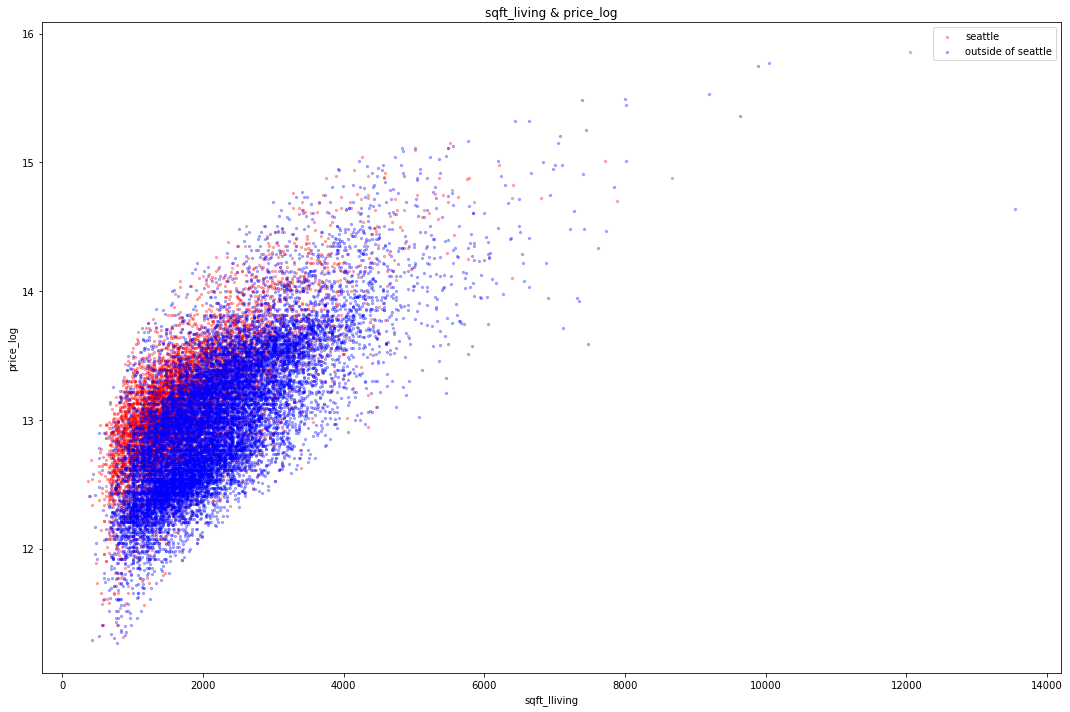

In [58]:
# Plot Log(sqft_living) and Log(price) 

plt.figure(figsize=(15, 10))
plt.scatter(x = df.loc[df.seattle==1].sqft_living , 
            y = df.loc[df.seattle==1].price_log , 
            c='r', s=5,
            alpha=0.3)
plt.scatter(x = df.loc[df.seattle==0].sqft_living , 
            y = df.loc[df.seattle==0].price_log , 
            c='b', s=5,
            alpha=0.3)


plt.xlabel("sqft_lliving")
plt.ylabel("price_log")
plt.title("sqft_living & price_log")
plt.legend(["seattle", "outside of seattle"])
plt.tight_layout()

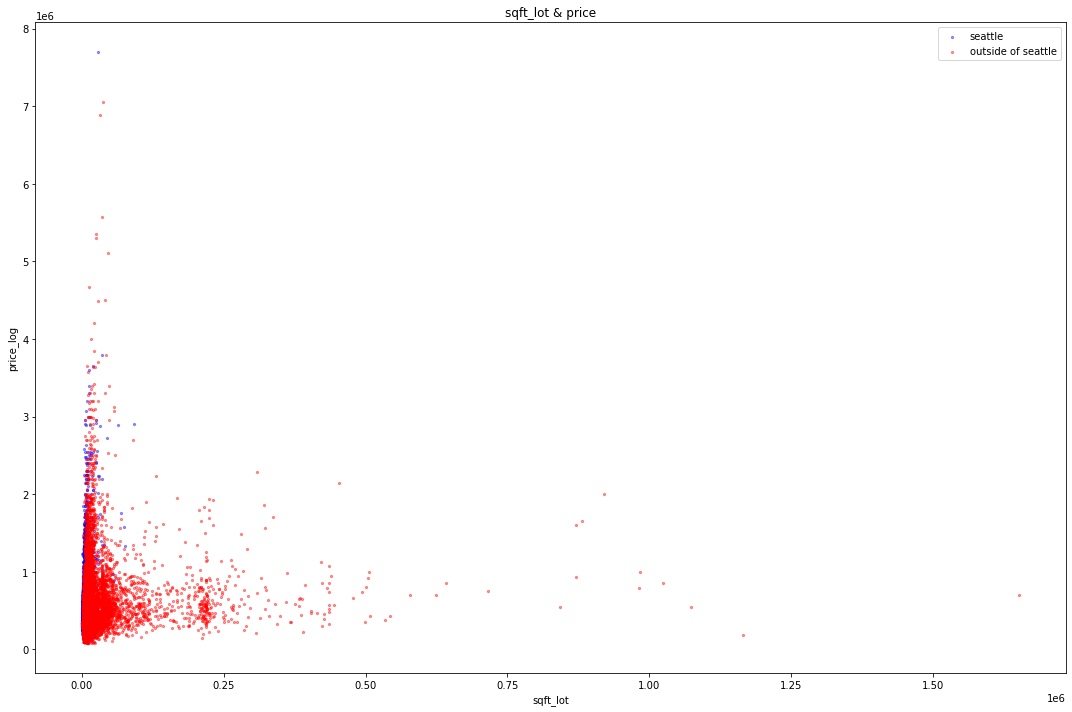

In [59]:
# Plot sqft_lot and price 

plt.figure(figsize=(15, 10))
plt.scatter(x = df.loc[df.seattle==1].sqft_lot , 
            y = df.loc[df.seattle==1].price , 
            c='b', s=5, 
            alpha=0.4)
plt.scatter(x = df.loc[df.seattle==0].sqft_lot , 
            y = df.loc[df.seattle==0].price , 
            c='r', s=5, 
            alpha=0.4)
plt.xlabel("sqft_lot")
plt.ylabel("price_log")
plt.title("sqft_lot & price")
plt.legend(["seattle", "outside of seattle"])
plt.tight_layout()


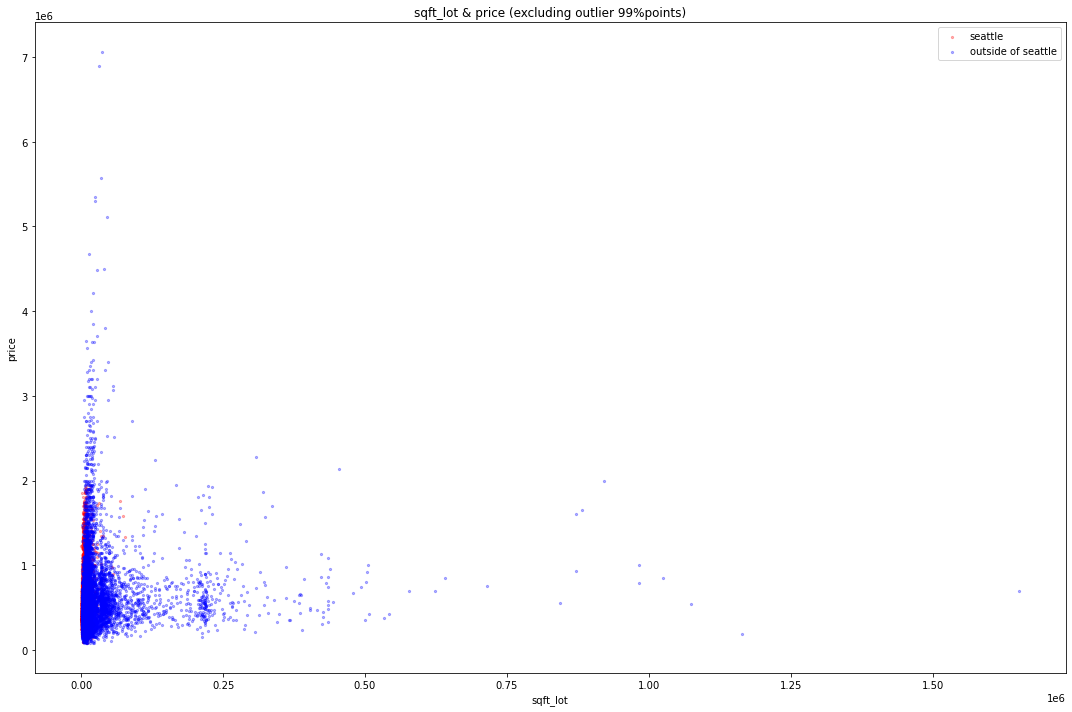

In [60]:
# Plot sqft_lotand price, trimmed outlier (99%points)

sqrt99 = df.sqft_lot.quantile(0.99)
price99 = df.price.quantile(0.99)

plt.figure(figsize=(15, 10))
plt.scatter(x = df.loc[(df.seattle==1) & (df.sqft_lot < sqrt99)& (df.price < price99) ].sqft_lot , 
            y = df.loc[(df.seattle==1) & (df.sqft_lot < sqrt99)& (df.price < price99)].price , 
            c='r', s=5,
            alpha=0.3)
plt.scatter(x = df.loc[df.seattle==0 & (df.sqft_lot < sqrt99) & (df.price < price99)].sqft_lot , 
            y = df.loc[df.seattle==0 & ((df.sqft_lot < sqrt99) & df.price < price99)].price , 
            c='b', s=5,
            alpha=0.3)


plt.xlabel("sqft_lot")
plt.ylabel("price")
plt.title("sqft_lot & price (excluding outlier 99%points)")
plt.legend(["seattle", "outside of seattle"])
plt.tight_layout()

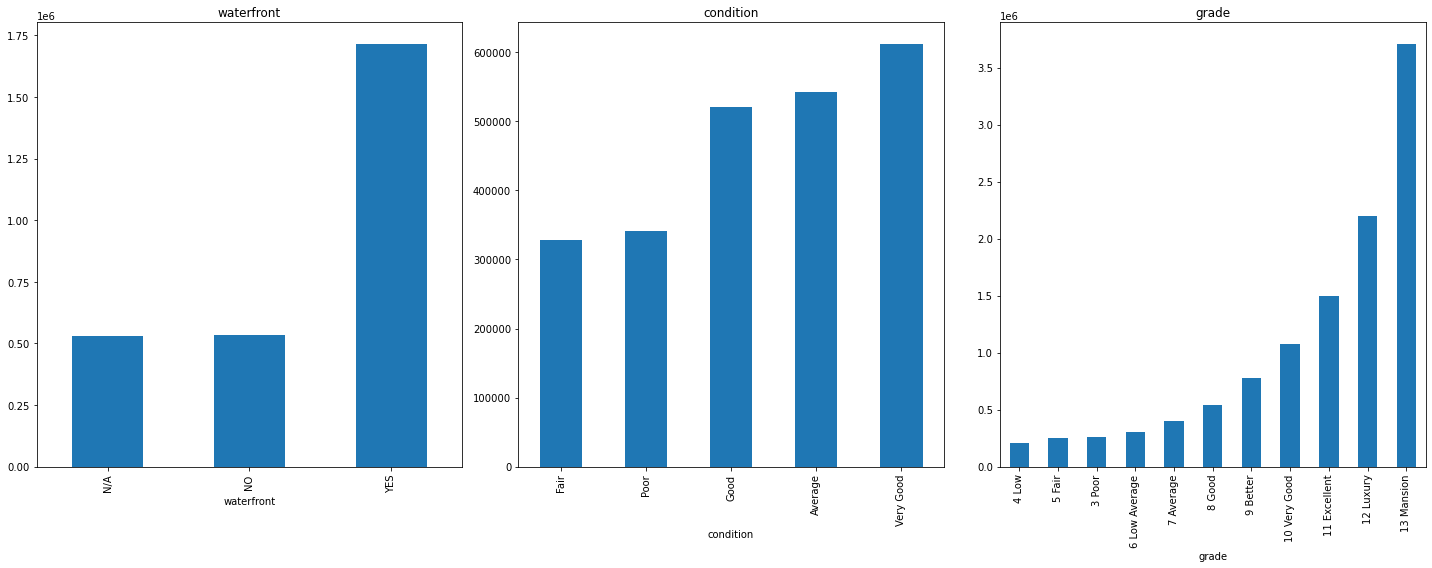

In [61]:
# Average housing price by categories. 

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20 , 8), sharey=False)
fig.set_tight_layout(True)

#select datatype=object
cate = df.select_dtypes(('object')).columns.drop(['date'])

for xcol, ax in zip(cate, axes.flatten()):
    df.groupby(xcol).mean()['price'].sort_values().plot.bar(ax=ax)
    
    ax.set_title(xcol)  
    
    
fig.tight_layout()


## grade => excellent (11-13), good (8-10), average(6-7), poor(3-5)
## condition => anove average (average,good, very good)? 
## water front => Yes and others? 

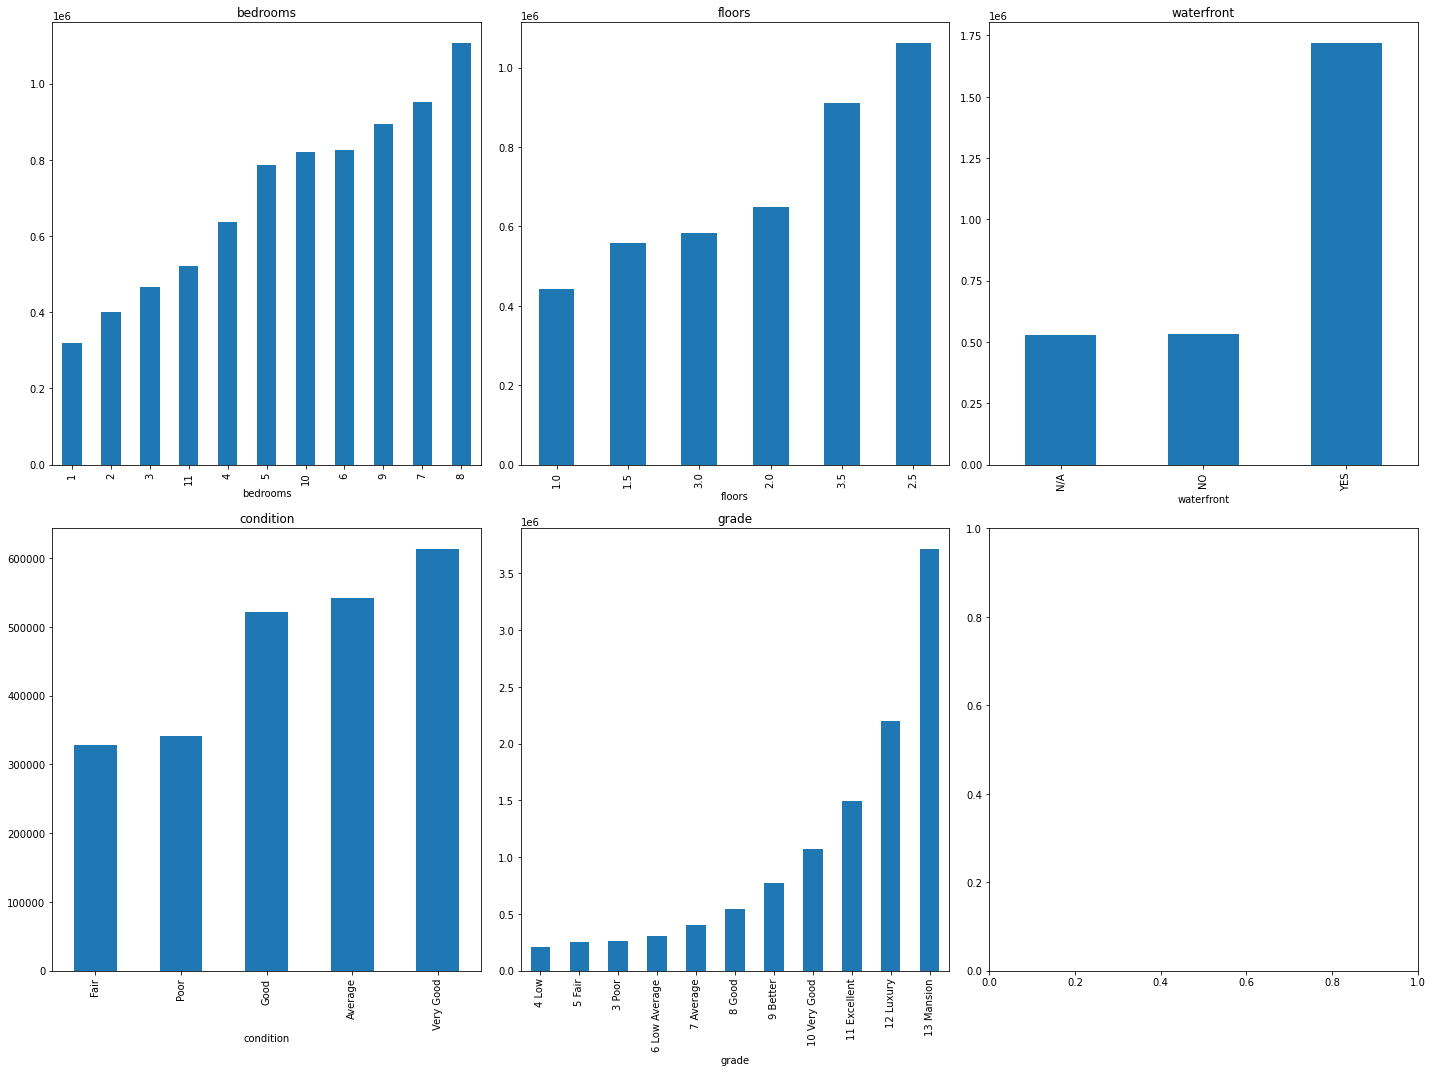

In [62]:
# Average price for categorical variables (+ bedrooms, floors) 

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20 , 15), sharey=False)

barchart = ['bedrooms', 'floors', 'waterfront', 'condition', 'grade']

for x, ax in zip(barchart, axes.flatten()):
    df.groupby(x).mean()['price'].sort_values().plot.bar(ax=ax)
    
    ax.set_title(x)  
    
    
fig.tight_layout()


In [63]:
df.floors.value_counts()
# drop 3.5 floor house? 

1.0    10672
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [64]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,price_log,yr_sold,vintage,seattle
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,N/A,Average,7 Average,1955,98178,12.309982,2014,59,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,98125,13.195614,2014,63,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,98028,12.100712,2015,82,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,98136,13.311329,2014,49,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,98074,13.142166,2015,28,0


#### 3. Categorical Values 

##### 3.1 Waterfront dummy (Yes=1)

In [65]:
df.waterfront.replace({'N/A' : 'N/A_NO' }, inplace = True)

In [66]:
wd = pd.get_dummies(df.waterfront, prefix='waterfront_' , drop_first=False)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21596 non-null  int64  
 1   date         21596 non-null  object 
 2   price        21596 non-null  float64
 3   bedrooms     21596 non-null  int64  
 4   bathrooms    21596 non-null  float64
 5   sqft_living  21596 non-null  int64  
 6   sqft_lot     21596 non-null  int64  
 7   floors       21596 non-null  float64
 8   waterfront   21596 non-null  object 
 9   condition    21596 non-null  object 
 10  grade        21596 non-null  object 
 11  yr_built     21596 non-null  int64  
 12  zipcode      21596 non-null  int64  
 13  price_log    21596 non-null  float64
 14  yr_sold      21596 non-null  int64  
 15  vintage      21596 non-null  int64  
 16  seattle      21596 non-null  int64  
dtypes: float64(4), int64(9), object(4)
memory usage: 3.0+ MB


In [68]:
wd

,waterfront__N/A_NO,waterfront__NO,waterfront__YES
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
21592,0,1,0
21593,0,1,0
21594,0,1,0
21595,1,0,0


In [69]:
wd = wd.waterfront__YES

In [70]:
df = pd.concat([df, wd], axis=1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,price_log,yr_sold,vintage,seattle,waterfront__YES
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,N/A_NO,Average,7 Average,1955,98178,12.309982,2014,59,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,98125,13.195614,2014,63,1,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,98028,12.100712,2015,82,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,98136,13.311329,2014,49,1,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,98074,13.142166,2015,28,0,0


In [71]:
df.drop(labels='waterfront', axis=1, inplace =True)

##### 3. 2 Condition Dummy 

In [72]:
df.condition.value_counts()

Average      14020
Good          5677
Very Good     1700
Fair           170
Poor            29
Name: condition, dtype: int64

In [73]:
# cond_good = 1 if condition = very good or good. 
df['cond_good'] = (df['condition'] =='Very Good') | ((df.condition =='Good')).astype(int)
df['cond_good']=df['cond_good'].astype(int)

In [74]:
# cond_ave = 1 if condition =average
df['cond_ave'] = (df['condition'] =='Average')
df['cond_ave']=df['cond_ave'].astype(int)

#### 3.3 Grade (convert to numeric value, (3(poor)-13(Mansion))

In [75]:
df.grade.value_counts()

7 Average        8973
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [76]:
df['grade'] = df['grade'].str.split().str[0]

In [77]:
df['grade']=df['grade'].astype(int)

In [78]:
df.grade.value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

#### 4. Heatmap, Corr matrix

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21596 non-null  int64  
 1   date             21596 non-null  object 
 2   price            21596 non-null  float64
 3   bedrooms         21596 non-null  int64  
 4   bathrooms        21596 non-null  float64
 5   sqft_living      21596 non-null  int64  
 6   sqft_lot         21596 non-null  int64  
 7   floors           21596 non-null  float64
 8   condition        21596 non-null  object 
 9   grade            21596 non-null  int64  
 10  yr_built         21596 non-null  int64  
 11  zipcode          21596 non-null  int64  
 12  price_log        21596 non-null  float64
 13  yr_sold          21596 non-null  int64  
 14  vintage          21596 non-null  int64  
 15  seattle          21596 non-null  int64  
 16  waterfront__YES  21596 non-null  uint8  
 17  cond_good   

In [80]:
# drop id, date, condition, zipcode
df.drop(labels=['id', 'date', 'condition', 'zipcode'], axis=1, inplace=True)

In [81]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,yr_built,price_log,yr_sold,vintage,seattle,waterfront__YES,cond_good,cond_ave
0,221900.0,3,1.00,1180,5650,1.0,7,1955,12.309982,2014,59,0,0,0,1
1,538000.0,3,2.25,2570,7242,2.0,7,1951,13.195614,2014,63,1,0,0,1
2,180000.0,2,1.00,770,10000,1.0,6,1933,12.100712,2015,82,0,0,0,1
3,604000.0,4,3.00,1960,5000,1.0,7,1965,13.311329,2014,49,1,0,1,0
4,510000.0,3,2.00,1680,8080,1.0,8,1987,13.142166,2015,28,0,0,0,1


In [88]:
# correlation between y and X 
corr = df.drop(labels='price_log', axis=1).corr()

<AxesSubplot:>

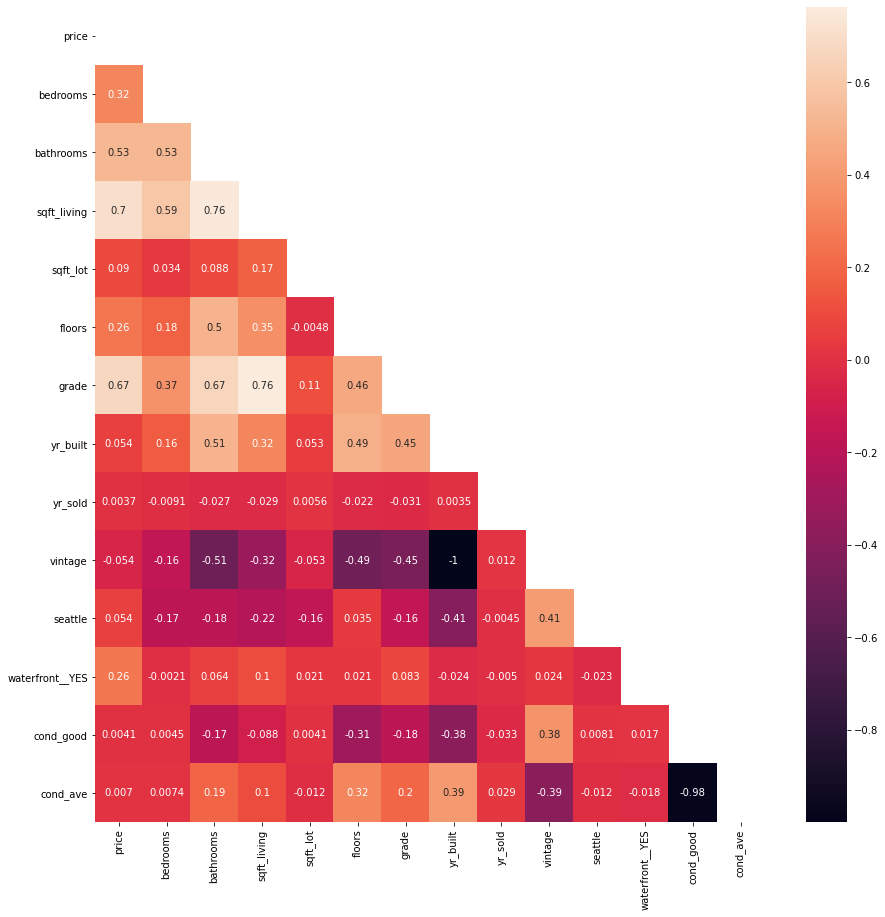

In [89]:
# heatmap 
fig, ax=plt.subplots(figsize=(15,15))
sns.heatmap(data=corr,
            mask=np.triu(np.ones_like(corr, dtype=bool)), 
            ax=ax,
            annot = True,
            )

In [83]:
# Model 1 
